# Capstone Project 1 Exploratory Data Analysis
## Molly McNamara

The dataset for this project consists of daily levels of 4 primary air pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) and their air quality indices from major cities across the United States between 2000 and 2016. The data is sourced from the United States Environmental Protection Agency and was obtained from Kaggle(https://www.kaggle.com/sogun3/uspollution).

### Import packages and dataset

In [1]:
import pandas as pd
pd.set_option("display.max.columns", 500)
import matplotlib.pyplot as plt
pollution = pd.read_csv('~/Desktop/cleanpollution.csv', index_col='Unnamed: 0')

In [2]:
pollution.head(3)

,Site_Num,Date_Local,State,County,City,NO2_Mean,NO2_1stMaxValue,NO2_1stMaxHour,NO2_AQI,O3_Mean,O3_1stMaxValue,O3_1stMaxHour,O3_AQI,SO2_Mean,SO2_1stMaxValue,SO2_1stMaxHour,SO2_AQI,CO_Mean,CO_1stMaxValue,CO_1stMaxHour,CO_AQI
0,1,2000-01-01,California,San Diego,Chula Vista,10.913043,20.0,0.0,19.0,0.031625,0.043,9.0,36.0,2.064907,2.65,6.0,4.0,0.603382,0.95,8.0,9.0
1,1,2000-01-02,California,San Diego,Chula Vista,10.869565,35.0,18.0,33.0,0.026833,0.040,9.0,34.0,1.748137,2.00,1.0,3.0,0.560145,1.15,20.5,10.0
2,1,2000-01-03,California,San Diego,Chula Vista,27.782609,45.0,17.0,42.0,0.011333,0.022,9.0,19.0,2.172671,3.00,14.0,4.0,1.174003,2.30,21.0,20.0


To begin with, the describe function was used to evaluate the basic statistics of the dataset.

In [3]:
pollution.describe()

,Site_Num,NO2_Mean,NO2_1stMaxValue,NO2_1stMaxHour,NO2_AQI,O3_Mean,O3_1stMaxValue,O3_1stMaxHour,O3_AQI,SO2_Mean,SO2_1stMaxValue,SO2_1stMaxHour,SO2_AQI,CO_Mean,CO_1stMaxValue,CO_1stMaxHour,CO_AQI
count,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412650.000000
mean,1110.318559,12.943202,25.557748,11.731099,24.038367,0.026092,0.039184,10.175389,35.964773,1.903953,4.564842,9.639881,7.245721,0.369380,0.626315,7.887068,6.042532
std,1955.594515,9.593288,16.118488,7.863331,15.274345,0.011415,0.015316,3.996333,19.623752,2.804391,7.503252,6.336021,12.034155,0.316870,0.627269,6.736911,5.942352
min,1.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.725155,-1.400000,0.000000,0.000000,-0.420834,-0.400000,0.000000,0.000000
25%,9.000000,5.816667,13.000000,5.000000,12.000000,0.017792,0.029000,9.000000,25.000000,0.254167,0.800000,4.500000,1.000000,0.185688,0.250000,3.000000,2.000000
50%,69.000000,10.869565,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,0.996875,2.000000,9.500000,3.000000,0.293478,0.450000,6.500000,5.000000
75%,1039.000000,17.916667,36.000000,20.000000,34.000000,0.033917,0.048000,11.000000,42.000000,2.390016,5.250000,13.500000,9.000000,0.466666,0.750000,11.000000,8.000000
max,9997.000000,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.612500,350.800000,23.000000,200.000000,7.151993,17.700000,23.000000,201.000000


The dataframe is comprised of data from 412,856 collection sites.  The four Air Quality Index values, one for each pollutant, range from 0 to 132-218 (depending on which pollutant).  

### Initial Exploratory Questions

How many states are represented in the dataset?

In [4]:
print("Number of States", pollution['State'].nunique())

Number of States 47


How many cities are represented in the dataset?

In [5]:
print("Number of Cities", pollution['City'].nunique())

Number of Cities 144


How many cities are represented for each state?

In [6]:
print("Number of Cities Per", pollution['City'].groupby(pollution['State']).nunique())

Number of Cities Per State
Alabama                  1
Alaska                   1
Arizona                  3
Arkansas                 1
California              35
Colorado                 3
Connecticut              4
Country Of Mexico        3
Delaware                 1
District Of Columbia     1
Florida                  2
Georgia                  1
Hawaii                   1
Idaho                    1
Illinois                 5
Indiana                  1
Iowa                     2
Kansas                   2
Kentucky                 6
Louisiana                2
Maine                    2
Maryland                 3
Massachusetts            1
Michigan                 2
Minnesota                1
Missouri                 7
Nevada                   2
New Hampshire            2
New Jersey               2
New Mexico               1
New York                 4
North Carolina           3
North Dakota             1
Ohio                     4
Oklahoma                 6
Oregon                   1
P

The number of cities with data collection sites varies by state.  This may in part be a function of population or size of state.

In [7]:
pollution.groupby('State').describe()

CO_1stMaxHour                                        \
                             count       mean       std  min   25%   50%   
State                                                                      
Alabama                      782.0   9.446292  6.686815  1.0  4.00  7.50   
Alaska                       494.0  10.128543  6.201091  0.0  5.00  9.50   
Arizona                    17045.0   9.512408  7.373326  0.0  3.50  8.50   
Arkansas                    3376.0   7.963344  6.843992  0.0  2.50  6.25   
California                140549.0   7.420427  6.203041  0.0  3.00  6.50   
Colorado                    8778.0   8.685635  6.515507  0.0  3.50  7.50   
Connecticut                 7486.0   8.232567  6.659648  0.0  3.00  7.00   
Country Of Mexico           2384.0  10.283767  7.219093  0.0  4.00  8.50   
Delaware                     909.0   8.914741  6.846543  0.0  3.50  7.50   
District Of Columbia        6433.0   9.304446  7.351721  0.0  3.50  7.50   
Florida                     6472.0   6.750077  6.211172  0.0  2.50  5.50   
Georgia                     1931.0   9.101243  7.176493  0.0  3.50  7.50   
Hawaii                      1378.0   4.300798  3.374239  0.0  1.75  3.50   
Idaho                        458.0   8.686681  6.906580  0.0  3.00  7.75   
Illinois                   10903.0   8.657892  7.417240  0.0  2.50  7.00   
Indiana                     3483.0   7.775912  7.509526  0.0  1.00  6.00   
Iowa                        4588.0   8.849608  6.571880  0.0  3.00  8.50   
Kansas                      7874.0   8.713106  7.317784  0.0  2.50  8.00   
Kentucky                    3674.0   7.515514  7.348055  0.0  0.50  6.00   
Louisiana                   5970.0   8.279816  6.899802  0.0  3.00  6.50   
Maine                       5911.0   8.160379  5.908581  0.0  3.50  8.00   
Maryland                    5889.0   8.147903  6.758928  0.0  3.00  7.00   
Massachusetts               5235.0  10.143012  6.939715  0.0  4.00  9.00   
Michigan                    2047.0   8.542501  6.684347  0.0  3.00  7.00   
Minnesota                    915.0   8.937158  6.566037  0.0  3.50  8.50   
Missouri                    4947.0   9.165858  7.324489  0.0  3.00  7.50   
Nevada                      2419.0   7.697396  6.677911  0.0  2.50  7.00   
New Hampshire               2324.0   7.824225  7.101198  0.0  1.00  7.00   
New Jersey                  6663.0   8.613237  7.070487  0.0  3.00  7.00   
New Mexico                  1787.0   8.706771  6.234807  0.0  3.50  7.50   
New York                   16262.0   8.627906  7.237166  0.0  3.00  7.50   
North Carolina              6067.0   9.097866  7.145052  0.0  3.25  7.50   
North Dakota                2755.0   8.104900  5.408686  0.0  3.50  8.50   
Ohio                        3813.0   8.504983  6.180477  0.0  3.50  7.50   
Oklahoma                    8627.0   7.265446  7.187267  0.0  0.50  5.00   
Oregon                      2949.0   9.464395  7.079907  0.0  3.50  8.50   
Pennsylvania               47235.0   7.226156  6.980911  0.0  1.00  5.50   
Rhode Island                1582.0   7.854298  6.119342  0.0  3.00  6.50   
South Carolina              1632.0   3.950061  4.831380  0.0  0.00  2.50   
South Dakota                2079.0   6.825156  5.996137  0.0  2.50  6.00   
Tennessee                   1462.0   4.026334  5.153379  0.0  0.00  1.00   
Texas                      30133.0   8.070919  7.005534  0.0  3.00  6.50   
Utah                        2163.0   7.021267  5.710464  0.0  3.00  7.00   
Virginia                    9109.0   7.433033  6.876264  0.0  2.00  6.00   
Washington                   241.0   8.767635  5.683671  0.0  3.50  9.00   
Wisconsin                    379.0   6.266491  7.740258  0.0  0.00  2.50   
Wyoming                     3264.0   6.385570  5.967131  0.0  0.00  5.00   

                                   CO_1stMaxValue                      \
                         75%   max          count      mean       std   
State                                                                   
A

The statistics by state show that each area seems to have its own unique patterns and that the dataset is quite rich in information. 

To better visualize this large dataset, some of the features can be plotted, beginning with a bar plot of the four Air Quality Indices. 

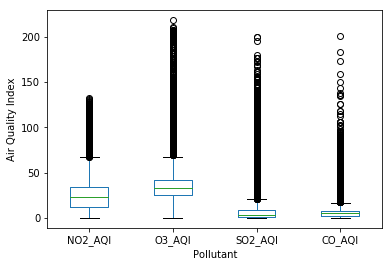

In [8]:
cols = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
pollution[cols].plot(kind='box')
plt.xlabel('Pollutant')
plt.ylabel('Air Quality Index')
plt.show()

### Top 10 Cities

To further evaluate the data, the dataset was filtered to the 10 most populous cities in the US (in 2016, at the end of the dataset time period - using census data: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population).  

In [9]:
top10cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
top10 = pollution[pollution['City'].isin(top10cities)]

How many data collection sites exist in the 10 most populous cities?

In [10]:
print("Number of Data Collection Sites in 10 Cities:", top10['Site_Num'].nunique())

Number of Data Collection Sites in 10 Cities: 19


The basic statistics were compared amongst the cities.

In [11]:
top10.groupby('City').describe()

CO_1stMaxHour                                                     \
                     count       mean       std  min    25%  50%    75%   max   
City                                                                            
Chicago              283.0  10.263251  5.748616  0.0  6.750  9.5  14.50  23.0   
Dallas              5187.0   8.578947  6.634462  0.0  3.500  7.0  11.50  23.0   
Houston             8405.0   8.086853  6.453842  0.0  3.000  6.5  10.50  23.0   
Los Angeles         9559.0   7.734360  5.971416  0.0  3.500  7.0   9.75  23.0   
New York           11351.0   9.167827  7.161223  0.0  3.000  8.0  14.00  23.0   
Philadelphia        5041.0   9.054751  7.087665  0.0  3.000  7.5  14.00  23.0   
Phoenix             9055.0   9.675594  7.474153  0.0  3.000  8.5  13.50  23.0   
San Antonio          894.0   8.010626  7.021256  0.0  2.625  6.5  11.50  23.0   
San Diego           7475.0   8.586990  5.902985  0.0  5.000  7.5  10.50  23.0   
San Jose            2609.0   8.175546  5.590362  0.0  4.500  7.0  10.50  23.0   

             CO_1stMaxValue                                                    \
                      count      mean       std   min     25%    50%      75%   
City                                                                            
Chicago               283.0  1.069081  0.430372  0.20  0.8000  1.000  1.30000   
Dallas               5187.0  0.526716  0.363260  0.00  0.3000  0.441  0.64750   
Houston              8405.0  0.471220  0.414097  0.00  0.2360  0.350  0.57800   
Los Angeles          9559.0  0.996732  0.822517 -0.40  0.4500  0.800  1.30000   
New York            11351.0  0.702185  0.422504  0.00  0.4375  0.650  0.87375   
Philadelphia         5041.0  0.648463  0.502474  0.00  0.3500  0.500  0.75000   
Phoenix              9055.0  1.178940  0.844239  0.00  0.5500  0.950  1.55000   
San Antonio           894.0  0.535962  0.417005  0.00  0.2500  0.400  0.75000   
San Diego            7475.0  1.370920  0.890557  0.00  0.7000  1.150  1.85000   
San Jose             2609.0  0.627277  0.459742  0.12  0.2850  0.438  0.86500   

                      CO_AQI                                                   \
                max    count       mean       std  min  25%   50%   75%   max   
City                                                                            
Chicago       2.650    283.0  10.215548  3.942787  2.0  7.0   9.0  13.0  26.0   
Dallas        3.900   5181.0   5.146883  3.493381  0.0  3.0   5.0   6.0  42.0   
Houston       7.050   8399.0   4.273961  3.990114  0.0  2.0   3.0   6.0  65.0   
Los Angeles   6.550   9554.0   9.680867  8.102814  0.0  5.0   8.0  13.0  66.0   
New York      7.850  11350.0   7.162291  4.036151  0.0  5.0   7.0   9.0  55.0   
Philadelphia  5.350   5028.0   6.456245  4.784876  0.0  3.0   6.0   8.0  51.0   
Phoenix       6.700   9051.0  11.087283  8.006165  0.0  6.0   9.0  15.0  59.0   
San Antonio   2.450    893.0   4.957447  3.945592  0.0  2.0   3.0   7.0  24.0   
San Diego     7.150   7471.0  13.091420  8.120796  0.0  7.0  11.0  17.0  65.0   
San Jose      2.595   2609.0   6.001916  4.554585  1.0  3.0   5.0   8.0  28.0   

              CO_Mean                                                    \
                count      mean       std       min       25%       50%   
City                                                                      
Chicago         283.0  0.632211  0.225868  0.110417  0.490625  0.608333   
Dallas         5187.0  0.315290  0.158965  0.000000  0.208138  0.286208   
Houston        8405.0  0.243003  0.202560 -0.023484  0.131580  0.204167   
Los Angeles    9559.0  0.561111  0.462731 -0.400000  0.261685  0.441097   
New York      11351.0  0.469464  0.239059  0.000000  0.294198  0.447916   
Philadelphia   5041.0  0.380377  0.230833 -0.070019  0.230163  0.330303   
Phoenix        9055.0  0.581824  0.392681  0.000000  0.312500  0.470834   
San Antonio     894.0  0.279116  0.188216  0.000000  0.143750  0.235417   
San Diego      7475.0  0.8

In [13]:
top10[cols].corr()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.047197,0.310792,0.662633
O3_AQI,0.047197,1.000000,-0.130724,-0.149881
SO2_AQI,0.310792,-0.130724,1.000000,0.222948
CO_AQI,0.662633,-0.149881,0.222948,1.000000


Each pollutant's Air Quality Index was compared visually between the cities.

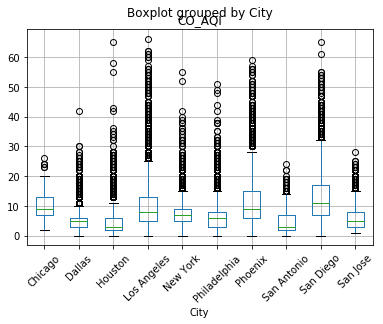

In [14]:
top10.boxplot(column='CO_AQI', by='City', rot=45)
plt.show()

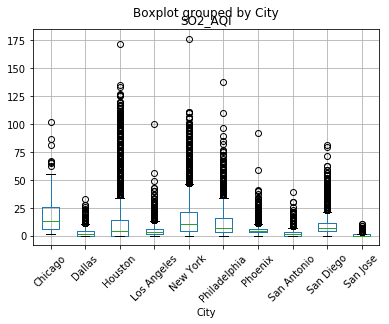

In [15]:
top10.boxplot(column='SO2_AQI', by='City', rot=45)
plt.show()

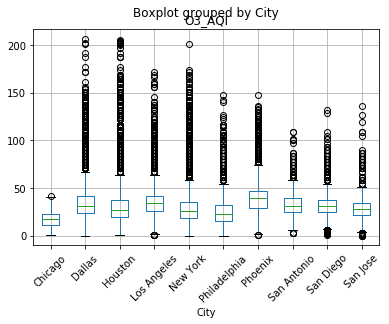

In [16]:
top10.boxplot(column='O3_AQI', by='City', rot=45)
plt.show()

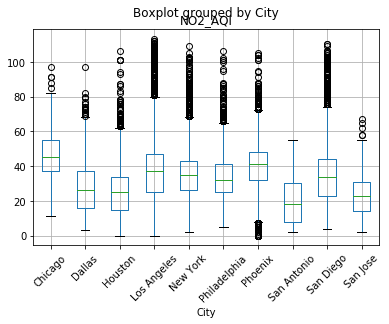

In [17]:
top10.boxplot(column='NO2_AQI', by='City', rot=45)
plt.show()

The boxplots confirmed that each city has its own unique profile of pollutants.

### Top 5 Cities

To see if any patterns are more evident, the dataset was again filtered down to the 5 largest cities in the US.

In [18]:
top5cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
top5 = pollution[pollution['City'].isin(top5cities)]

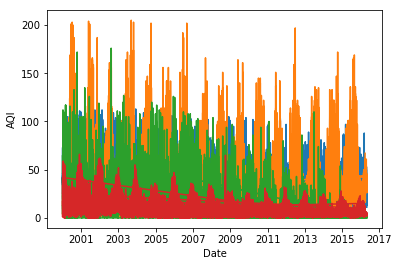

In [22]:
cols = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
plt.plot_date(top5['Date_Local'], top5[cols], linestyle='solid', marker='None')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

There certainly appear to be seasonal trends for each Air Quality Index value based on this graph.  These trends and changes over time could be interesting to investigate with respect to other companion datasets such as weather data or respiratory hospitalization rates.

Can we look at these values by city over time?

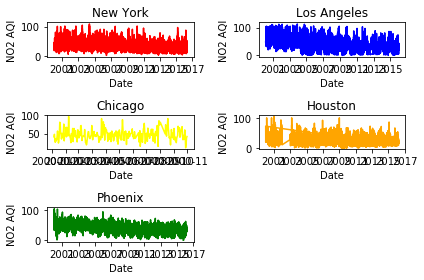

In [44]:
plt.subplot(3, 2, 1)
NY = top5[(top5.City=='New York')]
plt.plot_date(NY['Date_Local'], NY['NO2_AQI'], linestyle='solid', marker='None', c='red')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('New York')
plt.subplot(3, 2, 2)
LA = top5[(top5.City=='Los Angeles')]
plt.plot_date(LA['Date_Local'], LA['NO2_AQI'], linestyle='solid', marker='None', c='blue')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Los Angeles')
plt.subplot(3, 2, 3)
CHI = top5[(top5.City=='Chicago')]
plt.plot_date(CHI['Date_Local'], CHI['NO2_AQI'], linestyle='solid', marker='None', c='yellow')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Chicago')
plt.subplot(3, 2, 4)
HOU = top5[(top5.City=='Houston')]
plt.plot_date(HOU['Date_Local'], HOU['NO2_AQI'], linestyle='solid', marker='None', c='orange')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Houston')
plt.subplot(3, 2, 5)
PHX = top5[(top5.City=='Phoenix')]
plt.plot_date(PHX['Date_Local'], PHX['NO2_AQI'], linestyle='solid', marker='None', c='green')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Phoenix')
plt.tight_layout()
plt.show()

In [20]:
top5[cols].corr()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.062581,0.249365,0.660627
O3_AQI,0.062581,1.000000,-0.152095,-0.142293
SO2_AQI,0.249365,-0.152095,1.000000,0.172291
CO_AQI,0.660627,-0.142293,0.172291,1.000000
